In [1]:
folder = 'log/'
files = ! ls $folder
print(files)

['gym_CartPole-v1_False_20210707103630', 'gym_CartPole-v1_False_20210707103718', 'gym_CartPole-v1_False_20210707103837', 'gym_CartPole-v1_False_20210707103900', 'gym_CartPole-v1_False_20210707104304', 'gym_CartPole-v1_False_20210707104329', 'gym_CartPole-v1_False_20210707104400', 'gym_CartPole-v1_False_20210707104547', 'gym_CartPole-v1_False_20210707104604', 'gym_CartPole-v1_False_20210707104619', 'gym_CartPole-v1_False_20210707134456', 'gym_CartPole-v1_False_20210707171454', 'gym_CartPole-v1_False_20210708115518', 'gym_CartPole-v1_False_20210708120556', 'gym_CartPole-v1_False_20210708120619', 'gym_CartPole-v1_False_GA_20210708181418', 'gym_CartPole-v1_False_GA_20210708182059', 'gym_CartPole-v1_False_GA_20210709102401', 'pettingzoo_boxing_v1_False_20210707141624', 'pettingzoo_boxing_v1_selfplay_20210708120131', 'pettingzoo_boxing_v1_selfplay_20210708120206', 'pettingzoo_boxing_v1_selfplay_20210708120241', 'pettingzoo_boxing_v1_selfplay_20210708120257', 'pettingzoo_boxing_v1_selfplay_20

In [32]:
import json

def load_data(file_name):
    file_dir = folder+files[0]
    file_dir = folder+file_name
    print(file_dir)
    
    data = json.load( open(file_dir+"/process.json"))
    print(data.keys())
    return data

In [112]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['savefig.facecolor']='white'

def plot(data, label='reward', smooth_radius=200, savepath=None):
    def smooth(y, radius=200, mode='two_sided'):
        if len(y) < 2*radius+1:
            return np.ones_like(y) * y.mean()
        elif mode == 'two_sided':
            convkernel = np.ones(2 * radius+1)
            return np.convolve(y, convkernel, mode='same') / \
                   np.convolve(np.ones_like(y), convkernel, mode='same')
        elif mode == 'causal':
            convkernel = np.ones(radius)
            out = np.convolve(y, convkernel,mode='full') / \
                  np.convolve(np.ones_like(y), convkernel, mode='full')
            return out[:-radius+1]

    colors = ['r', 'b', 'c', 'y']
    
    for (k, v), c in zip(data.items(), colors):
#         if label=='RL loss':
        v=v[:2000]
        plt.plot(smooth(v, radius=smooth_radius), color=c, label=k)
        plt.plot(v, color=c, alpha=0.3)
    plt.legend()
    plt.grid()
    plt.title(label)
    plt.xlabel('episode')
    plt.ylabel(label)
    if savepath is not None:
        plt.savefig(savepath, bbox_inches='tight',)
    
img_path = 'generated_img/'

log/slimevolley_SlimeVolley-v0_False_DQN_20210709112958
dict_keys(['episode_reward', 'loss', 'episode_length'])


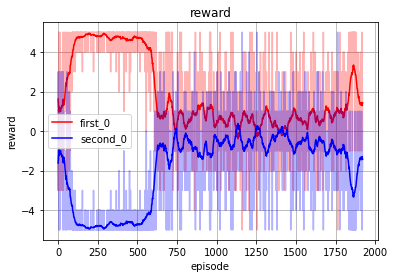

In [106]:
file_name =  'slimevolley_SlimeVolley-v0_False_DQN_20210709112958'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')

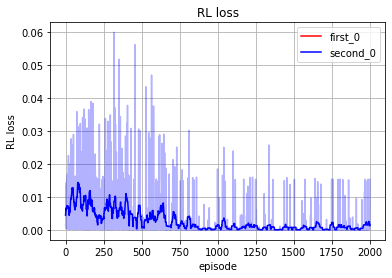

In [107]:
plot(data['loss'], 'RL loss', smooth_radius=10, savepath=img_path+file_name+'loss')

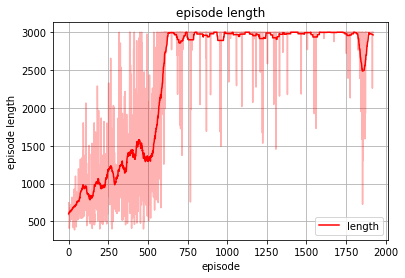

In [108]:
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, savepath=img_path+file_name+'length')

log/slimevolley_SlimeVolley-v0_False_DQN_20210709135033
dict_keys(['episode_reward', 'loss', 'episode_length'])


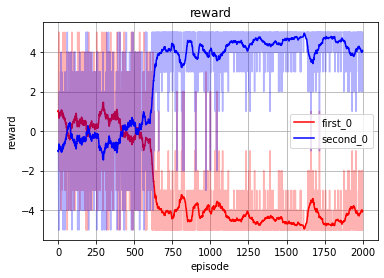

In [113]:
file_name =  'slimevolley_SlimeVolley-v0_False_DQN_20210709135033'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')

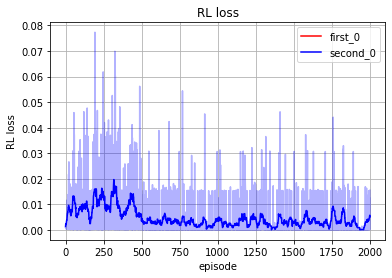

In [114]:
plot(data['loss'], 'RL loss', smooth_radius=10, savepath=img_path+file_name+'loss')

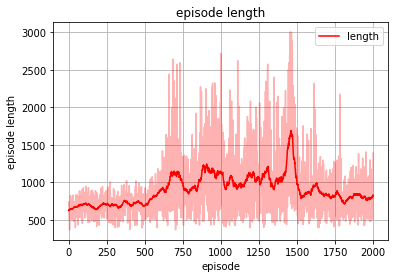

In [115]:
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, savepath=img_path+file_name+'length')